In [70]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

In [2]:
parkinsons_data = pd.read_csv('../datasets/parkinsons disease dataset/parkinsons_udprs_one.csv')

In [3]:
parkinsons_data.head()

,subject#,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,...,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,motor_UPDRS,total_UPDRS
0,1,72,0,25.6470,0.00340,0.000021,0.00178,0.00162,0.00533,0.01452,...,0.00765,0.00926,0.02132,0.016636,25.986,0.42271,0.56963,0.11774,35.810,28.905
1,1,72,0,103.6400,0.00395,0.000023,0.00158,0.00232,0.00473,0.01208,...,0.00637,0.00879,0.01533,0.022641,28.220,0.44028,0.59017,0.24612,41.657,32.243
2,1,72,0,5.6431,0.00348,0.000016,0.00124,0.00133,0.00372,0.01192,...,0.00463,0.00949,0.01234,0.009238,27.927,0.37340,0.52499,0.17066,34.398,28.199
3,1,72,0,47.6490,0.00800,0.000043,0.00417,0.00423,0.01252,0.01329,...,0.00649,0.01069,0.01652,0.060182,25.347,0.43478,0.55140,0.26728,37.363,29.682
4,1,72,0,47.6510,0.00514,0.000027,0.00192,0.00223,0.00575,0.02012,...,0.01118,0.02001,0.02607,0.017879,23.309,0.50064,0.54761,0.21011,37.364,29.682


In [4]:
parkinsons_data.shape

(1058, 22)

In [5]:
parkinsons_data.isnull().sum()

subject#         0
age              0
sex              0
test_time        0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
motor_UPDRS      0
total_UPDRS      0
dtype: int64

In [93]:
bins = [0, 20, float('inf')]
labels = [0, 1]

parkinsons_data['severity'] = pd.cut(parkinsons_data['motor_UPDRS'], bins=bins, labels=labels)

In [94]:
parkinsons_data

,subject#,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,...,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,motor_UPDRS,total_UPDRS,severity
0,1,72,0,25.6470,0.00340,0.000021,0.00178,0.00162,0.00533,0.01452,...,0.00926,0.02132,0.016636,25.986,0.42271,0.56963,0.11774,35.810,28.905,1
1,1,72,0,103.6400,0.00395,0.000023,0.00158,0.00232,0.00473,0.01208,...,0.00879,0.01533,0.022641,28.220,0.44028,0.59017,0.24612,41.657,32.243,1
2,1,72,0,5.6431,0.00348,0.000016,0.00124,0.00133,0.00372,0.01192,...,0.00949,0.01234,0.009238,27.927,0.37340,0.52499,0.17066,34.398,28.199,1
3,1,72,0,47.6490,0.00800,0.000043,0.00417,0.00423,0.01252,0.01329,...,0.01069,0.01652,0.060182,25.347,0.43478,0.55140,0.26728,37.363,29.682,1
4,1,72,0,47.6510,0.00514,0.000027,0.00192,0.00223,0.00575,0.02012,...,0.02001,0.02607,0.017879,23.309,0.50064,0.54761,0.21011,37.364,29.682,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,42,61,0,121.6300,0.00250,0.000019,0.00116,0.00136,0.00347,0.02217,...,0.01987,0.03313,0.012234,20.661,0.47256,0.57177,0.13955,34.979,23.979,1
1054,42,61,0,136.8000,0.00253,0.000022,0.00115,0.00144,0.00346,0.01470,...,0.01425,0.02054,0.004581,25.594,0.49895,0.60234,0.13203,33.908,22.908,1
1055,42,61,0,136.8000,0.00274,0.000021,0.00118,0.00138,0.00355,0.02526,...,0.02108,0.04126,0.006058,23.935,0.45357,0.56142,0.13446,33.908,22.908,1
1056,42,61,0,136.8000,0.00269,0.000023,0.00122,0.00154,0.00367,0.01788,...,0.01693,0.02519,0.005406,25.164,0.40825,0.60749,0.13455,33.908,22.908,1


In [117]:
x = parkinsons_data.drop(['subject#','total_UPDRS','motor_UPDRS','severity'], axis=1)
y = parkinsons_data['severity']

In [118]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2)

In [119]:
xTrain

,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
678,57,1,21.501,0.00510,0.000028,0.00287,0.00275,0.00860,0.04617,0.398,0.02399,0.02914,0.03906,0.07196,0.004164,25.197,0.35667,0.76023,0.19059
830,59,0,136.680,0.00629,0.000063,0.00320,0.00357,0.00960,0.01602,0.137,0.00747,0.00983,0.01712,0.02240,0.022685,18.186,0.71677,0.72648,0.29679
274,58,0,143.480,0.00256,0.000020,0.00102,0.00133,0.00306,0.01872,0.162,0.00852,0.01143,0.01853,0.02555,0.011088,25.639,0.69484,0.62713,0.13724
885,62,1,36.289,0.01476,0.000095,0.00714,0.01116,0.02142,0.12614,1.173,0.07019,0.08584,0.08843,0.21057,0.151970,10.682,0.68095,0.63317,0.37187
1017,68,1,169.500,0.00716,0.000037,0.00368,0.00351,0.01105,0.02831,0.263,0.01197,0.01540,0.02868,0.03591,0.036368,22.094,0.58891,0.67348,0.33419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,49,0,137.360,0.00367,0.000032,0.00135,0.00145,0.00404,0.00990,0.090,0.00365,0.00501,0.00972,0.01096,0.010535,25.119,0.50402,0.59268,0.12217
686,57,1,162.510,0.00310,0.000018,0.00115,0.00158,0.00345,0.01588,0.139,0.00775,0.00822,0.01296,0.02326,0.013265,23.300,0.50745,0.67728,0.16861
500,67,0,123.830,0.00409,0.000032,0.00210,0.00239,0.00629,0.01527,0.132,0.00787,0.00962,0.01242,0.02360,0.005344,23.544,0.43546,0.81073,0.17497
929,67,0,140.880,0.00394,0.000022,0.00182,0.00185,0.00547,0.01776,0.156,0.00868,0.00941,0.01332,0.02604,0.022323,24.833,0.56532,0.64132,0.20046


In [120]:
yTrain

678     0
830     1
274     1
885     1
1017    1
       ..
744     1
686     0
500     0
929     1
813     1
Name: severity, Length: 846, dtype: category
Categories (2, int64): [0 < 1]

In [121]:
print(np.unique(yTrain))

[0 1]


In [122]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
svm_model = SVC(random_state=42, probability=True)
xgb_model = XGBClassifier()

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

rf_scores = cross_val_score(rf_model, x, y, cv=kfold)
print(f"Random Forest CV Scores: {rf_scores}")
print(f"Random Forest CV Mean Score: {rf_scores.mean()}")
print("--"*40)

svm_scores = cross_val_score(svm_model, x, y, cv=kfold)
print(f"SVM CV Scores: {svm_scores}")
print(f"SVM CV Mean Score: {svm_scores.mean()}")
print("--"*40)

xgb_scores = cross_val_score(xgb_model, x, y, cv=kfold)
print(f"XGBoost CV Scores: {xgb_scores}")
print(f"XGBoost CV Mean Score: {xgb_scores.mean()}")
print("--"*40)

Random Forest CV Scores: [0.87264151 0.89622642 0.87735849 0.93364929 0.8957346 ]
Random Forest CV Mean Score: 0.8951220602700527
--------------------------------------------------------------------------------
SVM CV Scores: [0.76415094 0.77358491 0.75471698 0.85308057 0.78199052]
SVM CV Mean Score: 0.7855047840472146
--------------------------------------------------------------------------------
XGBoost CV Scores: [0.94811321 0.95754717 0.98584906 0.98104265 0.95734597]
XGBoost CV Mean Score: 0.9659796119109363
--------------------------------------------------------------------------------


Accuracy on train data by SVM Classifier: 77.54137115839244


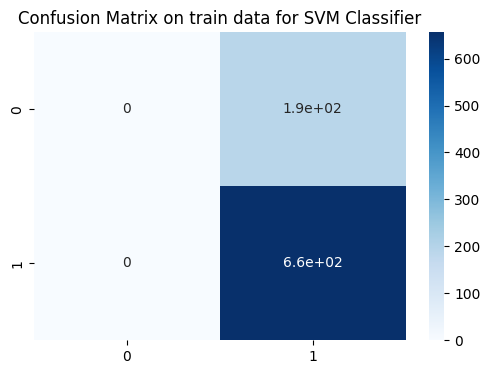

Accuracy on test data by SVM Classifier: 82.54716981132076


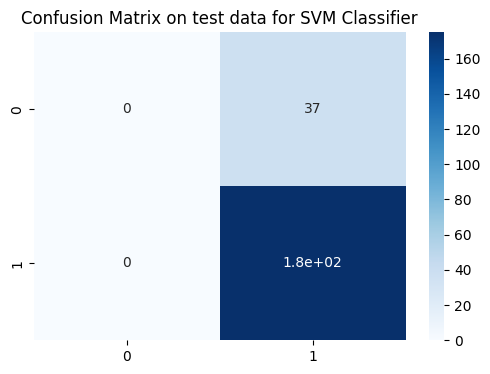

In [123]:
svm_model.fit(xTrain, yTrain)
preds_test = svm_model.predict(xTest)
preds_train = svm_model.predict(xTrain)

print(f"Accuracy on train data by SVM Classifier\
: {accuracy_score(yTrain, svm_model.predict(xTrain))*100}")
cf_matrix_train = confusion_matrix(yTrain, preds_train)
plt.figure(figsize=(6,4))
sns.heatmap(cf_matrix_train, annot=True, cmap='Blues')
plt.title("Confusion Matrix on train data for SVM Classifier")
plt.show()

print(f"Accuracy on test data by SVM Classifier\
: {accuracy_score(yTest, preds_test)*100}")
cf_matrix = confusion_matrix(yTest, preds_test)
plt.figure(figsize=(6,4))
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.title("Confusion Matrix on test data for SVM Classifier")
plt.show()

Accuracy on train data by Random Forest Classifier: 99.17257683215131


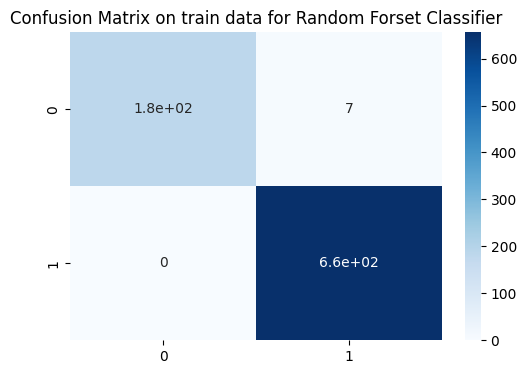

Accuracy on test data by Random Forest Classifier: 93.86792452830188


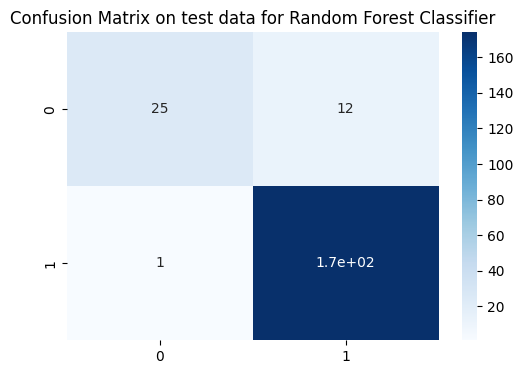

In [124]:
rf_model.fit(xTrain, yTrain)
preds_test = rf_model.predict(xTest)
preds_train = rf_model.predict(xTrain)

print(f"Accuracy on train data by Random Forest Classifier\
: {accuracy_score(yTrain, rf_model.predict(xTrain))*100}")

cf_matrix_train = confusion_matrix(yTrain, preds_train)
plt.figure(figsize=(6,4))
sns.heatmap(cf_matrix_train, annot=True, cmap='Blues')
plt.title("Confusion Matrix on train data for Random Forset Classifier")
plt.show()

print(f"Accuracy on test data by Random Forest Classifier\
: {accuracy_score(yTest, preds_test)*100}")

cf_matrix = confusion_matrix(yTest, preds_test)
plt.figure(figsize=(6,4))
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.title("Confusion Matrix on test data for Random Forest Classifier")
plt.show()

Accuracy on the train data XGBoost Classifier : 100.0


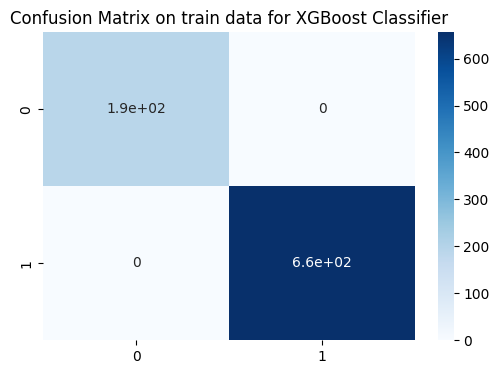

Accuracy on the test data by XGBoost Classifier: 98.11320754716981


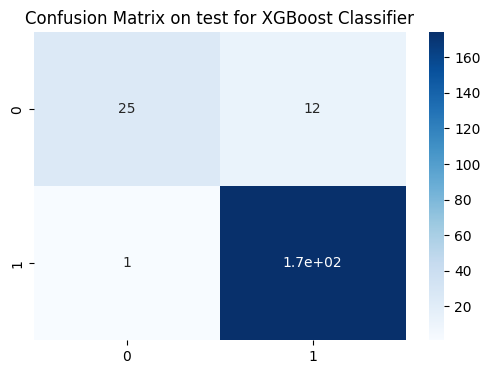

In [125]:
xgb_model.fit(xTrain, yTrain)
predict_test = xgb_model.predict(xTest)
predict_train = xgb_model.predict(xTrain)

print(f"Accuracy on the train data XGBoost Classifier : {accuracy_score(yTrain, xgb_model.predict(xTrain)) * 100}")
cf_matrix_train = confusion_matrix(yTrain, predict_train)
plt.figure(figsize=(6,4))
sns.heatmap(cf_matrix_train, annot=True, cmap='Blues')
plt.title("Confusion Matrix on train data for XGBoost Classifier")
plt.show()

print(f"Accuracy on the test data by XGBoost Classifier: {accuracy_score(yTest, predict_test) * 100}")
cf_matrix = confusion_matrix(yTest, preds_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.title("Confusion Matrix on test for XGBoost Classifier")
plt.show()

In [128]:
input_data = (58,0,115.8,0.01026,8.18E-05,0.00565,0.00565,0.01695,0.04916,0.47,0.02847,0.02859,0.03192,0.08542,0.040806,17.706,0.53097,0.77486,0.23395)

input_data = np.asarray(input_data)

input_data_reshaped = input_data.reshape(1, -1)

In [133]:
result = VotingClassifier(estimators=[('svm', svm_model), ('rf', rf_model), ('xgb', xgb_model)], voting='soft')

result.fit(xTrain, yTrain)
prediction = result.predict(input_data_reshaped)

if prediction[0] == 0:
    print("The person has Parkinson's disease but not Severe")
else:
    print("The person has Severe Parkinson's disease")

The person has Parkinson's disease but not Severe


c:\Users\karti\anaconda3\envs\DiseaseDetection\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\karti\anaconda3\envs\DiseaseDetection\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [134]:
import pickle
filename = '../models/trained_model_parkinsons_udprs.sav'
pickle.dump(result, open(filename, 'wb'))
loaded_model = pickle.load(open('../models/trained_model_parkinsons_udprs.sav', 'rb'))
input_data = (58,0,115.8,0.01026,8.18E-05,0.00565,0.00565,0.01695,0.04916,0.47,0.02847,0.02859,0.03192,0.08542,0.040806,17.706,0.53097,0.77486,0.23395)
input_data = np.asarray(input_data)
input_data_reshaped = input_data.reshape(1, -1)

result = loaded_model.predict(input_data_reshaped)

if prediction[0] == 0:
    print("The person has Parkinson's disease but not Severe")
else:
    print("The person has Severe Parkinson's disease")

The person has Parkinson's disease but not Severe


c:\Users\karti\anaconda3\envs\DiseaseDetection\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\karti\anaconda3\envs\DiseaseDetection\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
